In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000, n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-0.74219659,  1.57731109],
       [ 0.81134757, -0.17651676],
       [ 0.36984097, -0.06153381],
       ...,
       [ 0.30152863,  0.23847117],
       [ 0.26931869,  0.38617072],
       [-0.11784997, -0.06835686]])

In [5]:
y

array([ 6.89935734e+01,  1.07780896e+00, -2.05193592e+00,  7.82791441e+00,
       -6.93759998e+01, -2.75719206e+01,  1.89495220e+01, -2.72530430e+01,
        6.27063438e+01,  1.14772923e+02, -1.34639690e+01,  8.18114400e+01,
        5.83594331e+01,  7.60359143e+01,  1.25664793e+01,  5.68172129e+01,
        5.33633747e+01, -4.23268030e+01, -7.59531788e+01, -5.15880590e+01,
       -3.74114144e+01,  5.15571232e+00,  1.68518680e+01,  5.64681517e+00,
       -7.69723597e+01,  3.97321815e+01, -2.51429833e+01,  1.41541331e+02,
       -6.43978407e+01,  5.42759041e+01, -1.51107886e+02,  6.90875092e+01,
       -1.35653640e+01, -6.49482549e+01,  1.42903733e+01,  1.51651725e+01,
       -1.74089986e+00,  6.90948617e+01, -1.53273799e+01,  2.79810829e+01,
        1.03289402e+02,  1.71713311e+01, -3.75714387e+00,  2.48200616e+01,
       -1.35861944e+02,  2.67764750e+01, -3.36783875e+00, -3.88364959e+01,
       -3.55910557e+01,  1.51715143e+01,  1.28594229e+02,  4.75504456e+01,
        3.05703894e+01, -

In [6]:
pd.DataFrame(X)[0]

0     -0.742197
1      0.811348
2      0.369841
3      1.173423
4     -0.687809
         ...   
995   -0.278899
996   -0.388710
997    0.301529
998    0.269319
999   -0.117850
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

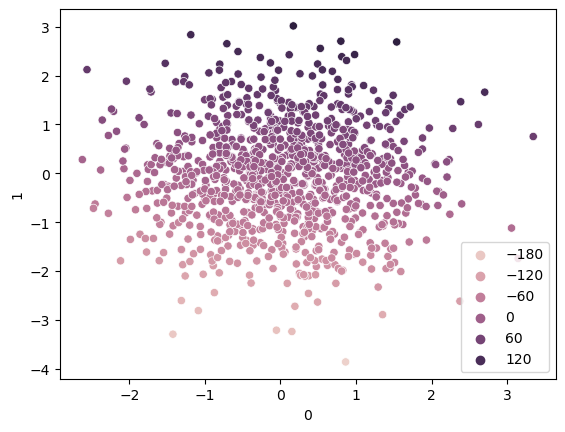

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr=SVR(kernel='linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[ 9.83559186, 51.80201297]])

In [14]:
## Prediciton
y_pred = svr.predict(X_test)

In [15]:
y_pred

array([  25.18653209,   76.33555669,  107.26992353, -101.05453429,
         69.43170299,   28.99096851,  -47.69979277,  -80.98710712,
         83.17845146,  -11.26645975,   40.7233128 ,   33.89989389,
         52.02393896,   36.11363859,   41.98317452, -139.23312899,
          8.12549702,   29.75772155,   37.99391721,   70.89894659,
        -29.00776761,   -8.58101939,   55.05120098,  -74.46635005,
         37.50077942,   48.14303152,  -24.27839294,   18.73336388,
         52.24742524,   -5.92752085,    7.3046157 ,  -15.84733842,
         33.17497023,   -6.92852488,  101.47653251,  -42.06093344,
        -31.27268094,   46.12164096,    8.68138199,  -67.80949162,
        -64.34163307,  -44.56492574,   -6.1332639 ,   53.02097175,
         -1.22733768,   49.80028183,   73.99953464, -108.555861  ,
        -30.02854337,   77.42732321,  135.40024769,   19.39292724,
        -29.07354476,  -79.38198582,   99.29321865,  -61.62874553,
         84.59308546,    7.17327196, -117.17884959,   17.37406

In [16]:
from sklearn.metrics import r2_score

In [31]:
print(r2_score(y_test,y_pred))

0.9969923658405091


### Hyperparameter Tuning with SVC


In [32]:
from sklearn.model_selection import GridSearchCV

# defining Parameter range 
param_grid ={
   'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]
}

In [33]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)


In [34]:
grid.fit(X_train,y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.976 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.974 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.979 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.974 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.978 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.978 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.979 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 1/5] END C=1, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.997 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.997 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.997 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.997 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.3, gamma=1, kernel=linear;, score=0.996 total time=   0.0s
[CV

[CV 3/5] END C=100, epsilon=0.1, gamma=1, kernel=linear;, score=0.997 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.1, gamma=1, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.1, gamma=1, kernel=linear;, score=0.997 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.997 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.997 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.997 total time=   0.0s
[C

[CV 3/5] END C=1000, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.997 total time=   0.3s
[CV 4/5] END C=1000, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.997 total time=   0.5s
[CV 5/5] END C=1000, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.997 total time=   0.3s
[CV 1/5] END C=1000, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.996 total time=   0.2s
[CV 2/5] END C=1000, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.997 total time=   0.4s
[CV 3/5] END C=1000, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.997 total time=   0.3s
[CV 4/5] END C=1000, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.997 total time=   0.5s
[CV 5/5] END C=1000, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.997 total time=   0.3s
[CV 1/5] END C=1000, epsilon=0.3, gamma=1, kernel=linear;, score=0.996 total time=   0.3s
[CV 2/5] END C=1000, epsilon=0.3, gamma=1, kernel=linear;, score=0.997 total time=   0.3s
[CV 3/5] END C=1000, epsilon=0.3, gamma=1, kernel=linear;, score=0

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [35]:
grid.best_params_

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [36]:
## Predicition
y_pred4 = grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.996960710980208
